In [ ]:
pip install datetime

In [ ]:
!pip install numpy matplotlib scikit-image opencv-python sklearn

In [ ]:
#properly installing sklearn
!pip3 install -U scikit-learn scipy matplotlib

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.morphology import skeletonize
import cv2
import json
from sklearn.svm import SVC

### [단계①] 라이브러리 및 데이터 불러오기

In [11]:
file_name = 'right_data.csv'
vectors = np.zeros((423,81920))

r = open(file_name,mode='r')
lines = r.readlines()

for data in range(0,423):
    
    numbers = lines[data].split(',')
    flir_vector = []
    
    for i in range(0,81920):
        flir_vector.append(float(numbers[i]))
    

    vectors[data,:] = np.transpose(flir_vector)

In [13]:
vectors

array([[17.392, 17.349, 17.436, ..., 16.259, 16.215, 16.193],
       [17.846, 17.889, 17.932, ..., 16.522, 16.522, 16.522],
       [17.284, 17.306, 17.414, ..., 16.369, 16.347, 16.325],
       ...,
       [23.789, 23.545, 23.626, ..., 22.685, 22.706, 22.85 ],
       [23.809, 23.748, 23.768, ..., 22.809, 22.891, 22.87 ],
       [23.728, 23.626, 23.646, ..., 22.685, 22.747, 22.788]])

### [단계②] 데이터 시각화

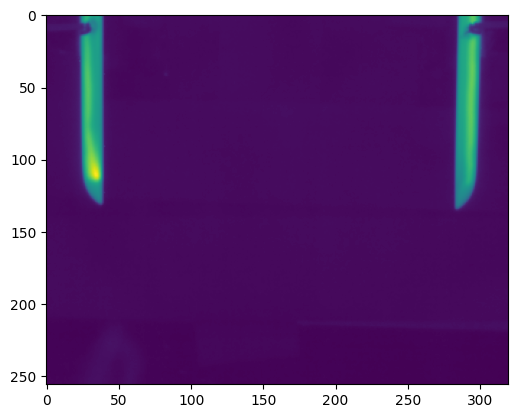

In [14]:
plt.figure(1)
plt.imshow(np.reshape(vectors[1,:],[256,320]))
plt.show()

In [24]:
processed_vectors = np.zeros((423,80))

for j in range(0,423):
    flir_image = np.reshape(vectors[j,:],[256,320])
    ret, mask = cv2.threshold(flir_image,41,255,cv2.THRESH_BINARY)
    
    mask = mask/255
    
    skeleton = skeletonize(mask)
    
    mixed = flir_image*skeleton
    mixed_right = mixed[0:255,160:319]
    
    min_thresh = 0
    
    res = np.where(mixed_right>min_thresh)[0]
    
    maxn = np.max(res)
    minn = np.max(res) - 80
    
    num = 0
    vector = np.zeros((80,1))
    
    for i in range(minn,maxn):
        ii = i-(minn)+1
        iii = maxn - ii
        index = np.where(mixed_right[iii,0:319]>0)[0]
        vector[num,0] = mixed_right[iii,index]
        num = num + 1
        
    vector = np.transpose(vector)
    processed_vectors[j,0:80] = vector

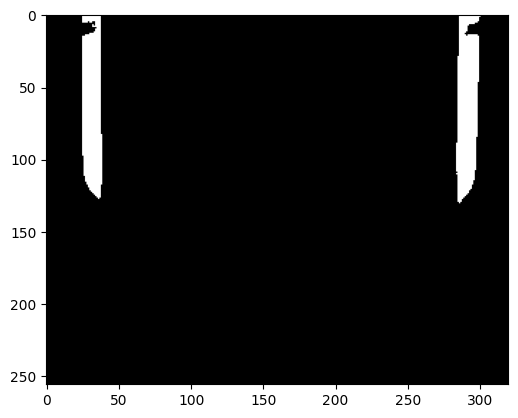

In [16]:
plt.figure(1)
plt.imshow(mask,cmap=plt.cm.gray)
plt.show()

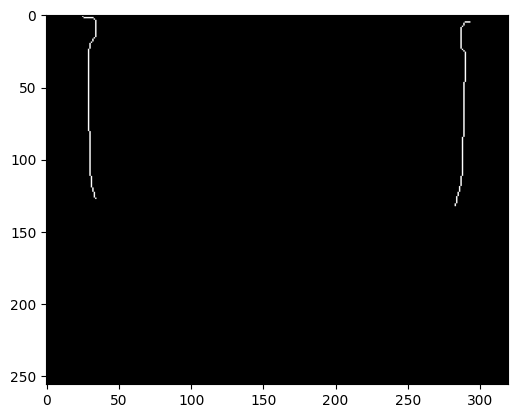

In [25]:
plt.figure(1)
plt.imshow(skeleton,cmap=plt.cm.gray)
plt.show()

In [26]:
res

array([  5,   5,   5,   5,   6,   7,   8,   9,  10,  11,  12,  13,  14,
        15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,  27,
        28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,  40,
        41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,  53,
        54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,  66,
        67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,  79,
        80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,  92,
        93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104, 105,
       106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118,
       119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131,
       132], dtype=int64)

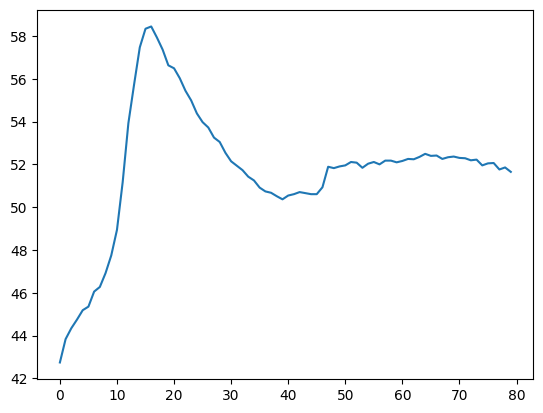

In [27]:
plt.figure(1)
plt.plot(np.arange(0,80),processed_vectors[422])
plt.show()

In [28]:
import json
with open('right_label.json','r') as infile:
    newlist = json.load(infile)
    
print(newlist)

[1.1, 1.1, 1.08, 1.05, 1.11, 1.13, 1.04, 0.94, 1.08, 1.01, 1.02, 1.01, 1.42, 1.8, 1.12, 1.78, 1.78, 1.68, 1.18, 1.48, 1.67, 1.6, 1.54, 1.6, 1.59, 1.54, 1.21, 1.52, 1.19, 1.27, 1.4, 1.35, 1.35, 1.19, 1.41, 1.39, 1.45, 1.47, 1.53, 1.57, 1.4, 1.61, 1.48, 1.54, 1.56, 1.45, 1.49, 1.32, 1.11, 1.04, 1.19, 1.03, 1.16, 1.08, 1.13, 1.16, 1.07, 1.06, 1.14, 1.15, 1.19, 1.16, 1.21, 1.1, 1.15, 1.16, 1.15, 1.2, 1.12, 1.2, 1.22, 1.11, 1.1, 1.08, 1.18, 1.1, 1.18, 1.09, 1.15, 1.13, 1.15, 1.16, 1.2, 1.2, 1.18, 1.18, 1.2, 1.14, 1.23, 1.39, 1.44, 1.56, 1.52, 1.42, 1.56, 1.47, 1.26, 1.37, 1.26, 1.24, 1.34, 1.47, 1.32, 1.3, 1.17, 1.1, 1.08, 1.13, 1.14, 1.14, 1.07, 1.11, 1.1, 1.11, 1.11, 1.18, 1.37, 1.36, 1.44, 1.21, 1.18, 1.48, 1.18, 1.15, 1.17, 1.22, 1.1, 1.16, 1.12, 1.16, 1.12, 1.08, 1.15, 1.12, 1.13, 1.14, 1.12, 1.13, 1.12, 1.14, 1.15, 1.18, 2.23, 2.15, 2.16, 2.13, 2.13, 2.12, 2.12, 1.39, 1.29, 1.48, 1.4, 1.2, 1.6, 1.29, 1.15, 1.16, 1.22, 1.67, 1.45, 1.36, 1.44, 1.16, 1.17, 1.41, 1.27, 1.48, 1.46, 1.26, 1

In [29]:
thres1 = 0.8
thres2 = 1.5

label = np.zeros((len(newlist),1))
num = 0

for val in newlist:
    if val<thres1:
        label[num] = 0
    elif thres1<val<thres2:
        label[num] =1
    elif val<thres2:
        label[num] =0
    num += 1
    
label

array([[1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],

In [33]:
import warnings

warnings.filterwarnings(action='ignore')

from sklearn.svm import SVC

datas = np.hstack((processed_vectors,label))
wrong_guess_stack =0

for i in range(0,100):
    np.random.shuffle(datas)
    
    sX = datas[0:300,0:80]
    sXt = datas[301:423,0:80]
    sY = datas[0:300,80:81]
    sYt = datas[301:423,80:81]
    
    model = SVC(kernel='rbf')
    model.fit(sX,sY)
    
    s_result = model.predict(sXt)
    
    wrong_guess = (np.sum(np.abs(s_result-np.transpose(sYt))))
    wrong_guess_stack += wrong_guess
    
(wrong_guess_stack/100/122)*100

4.360655737704918